# CLUSTERING OF COUNTRIES - ASSIGNMENT

In [1]:
# filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import required libraries
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to scale our data
from sklearn.preprocessing import StandardScaler

# for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# K-Means
from sklearn.metrics import silhouette_score

# to perform Kmeans- clustering
from sklearn.cluster import KMeans

# to perform Hierarchical-clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## 1. Reading and Understanding of Data

### 1.1 Importing the .csv file

In [3]:
country_details= pd.read_csv("Country-data.csv")

### 1.2 Examine the country-data file

In [4]:
# checking the top 5 rows of the country-data file

country_details.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# checking the shape of the country-data file

country_details.shape

(167, 10)

In [6]:
# Checking numerical columns data distribution statistics

country_details.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# checking the size of the country-data file

country_details.size

1670

In [8]:
# checking other information of the country-data file

country_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 2. Data Quality: Missing value, Duplicate data and Spelling mistake checking

In [9]:
# checking missing value

country_details.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- After seeing above, we find that there is no missing value.

In [10]:
# checking duplicate data
# creating a copy of original data for duplicate checking

country_dup= country_details

In [11]:
# checking and dropping all duplicate row if any

country_dup.drop_duplicates(subset=None, inplace=True)
country_dup.shape

(167, 10)

- After seeing above, we find that there is no Duplicate data.

In [12]:
# checking for spelling mistakes

print(country_details['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

## 3. Checking Outliers

In [13]:
# Building boxplot for checking outliers

def plot(col,x,y):
    plt.figure(figsize=(x,y))
    plt.subplot(1,1,1)
    sns.boxplot(col, data= country_details)
    return

### 3.1.1 'gdpp'

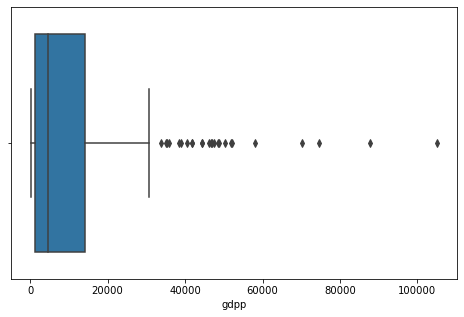

In [14]:
plot('gdpp',8,5)

### 3.1.2 'child_mort'

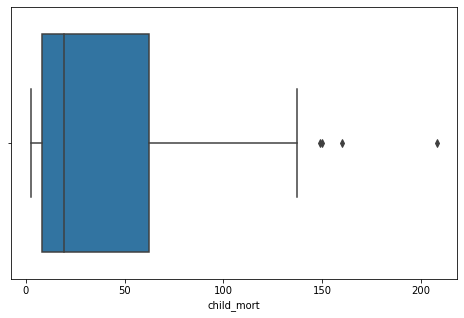

In [15]:
plot('child_mort',8,5)

### 3.1.3 'income'

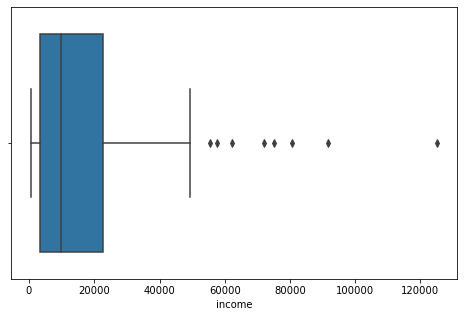

In [16]:
plot('income',8,5)

### 3.1.4 'inflation'

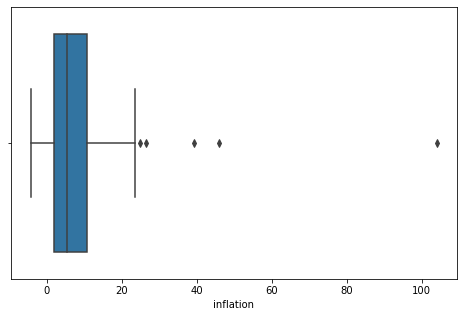

In [17]:
plot('inflation',8,5)

- We see that gdpp, child_mort, income and inflation columns has high outliers. 
- As of now, not remove the outliers as it may suits the business needs or a lot of countries are getting removed.

### 3.2 Lets handle column 'gdpp' initially.

In [18]:
country_details.set_index('country', inplace = True)

Q1= country_details.gdpp.quantile(0.05)
Q3= country_details.gdpp.quantile(0.95)

country_df=country_details[(country_details.gdpp <= Q3)]

In [19]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
max,208.000000,200.000000,17.900000,174.000000,80600.000000,104.000000,82.800000,7.490000,48400.000000


- We seen that most of the outliers are handle just by handling 'gdpp' columns.

In [20]:
country_df.shape

(158, 9)

## 4. Data Visualization

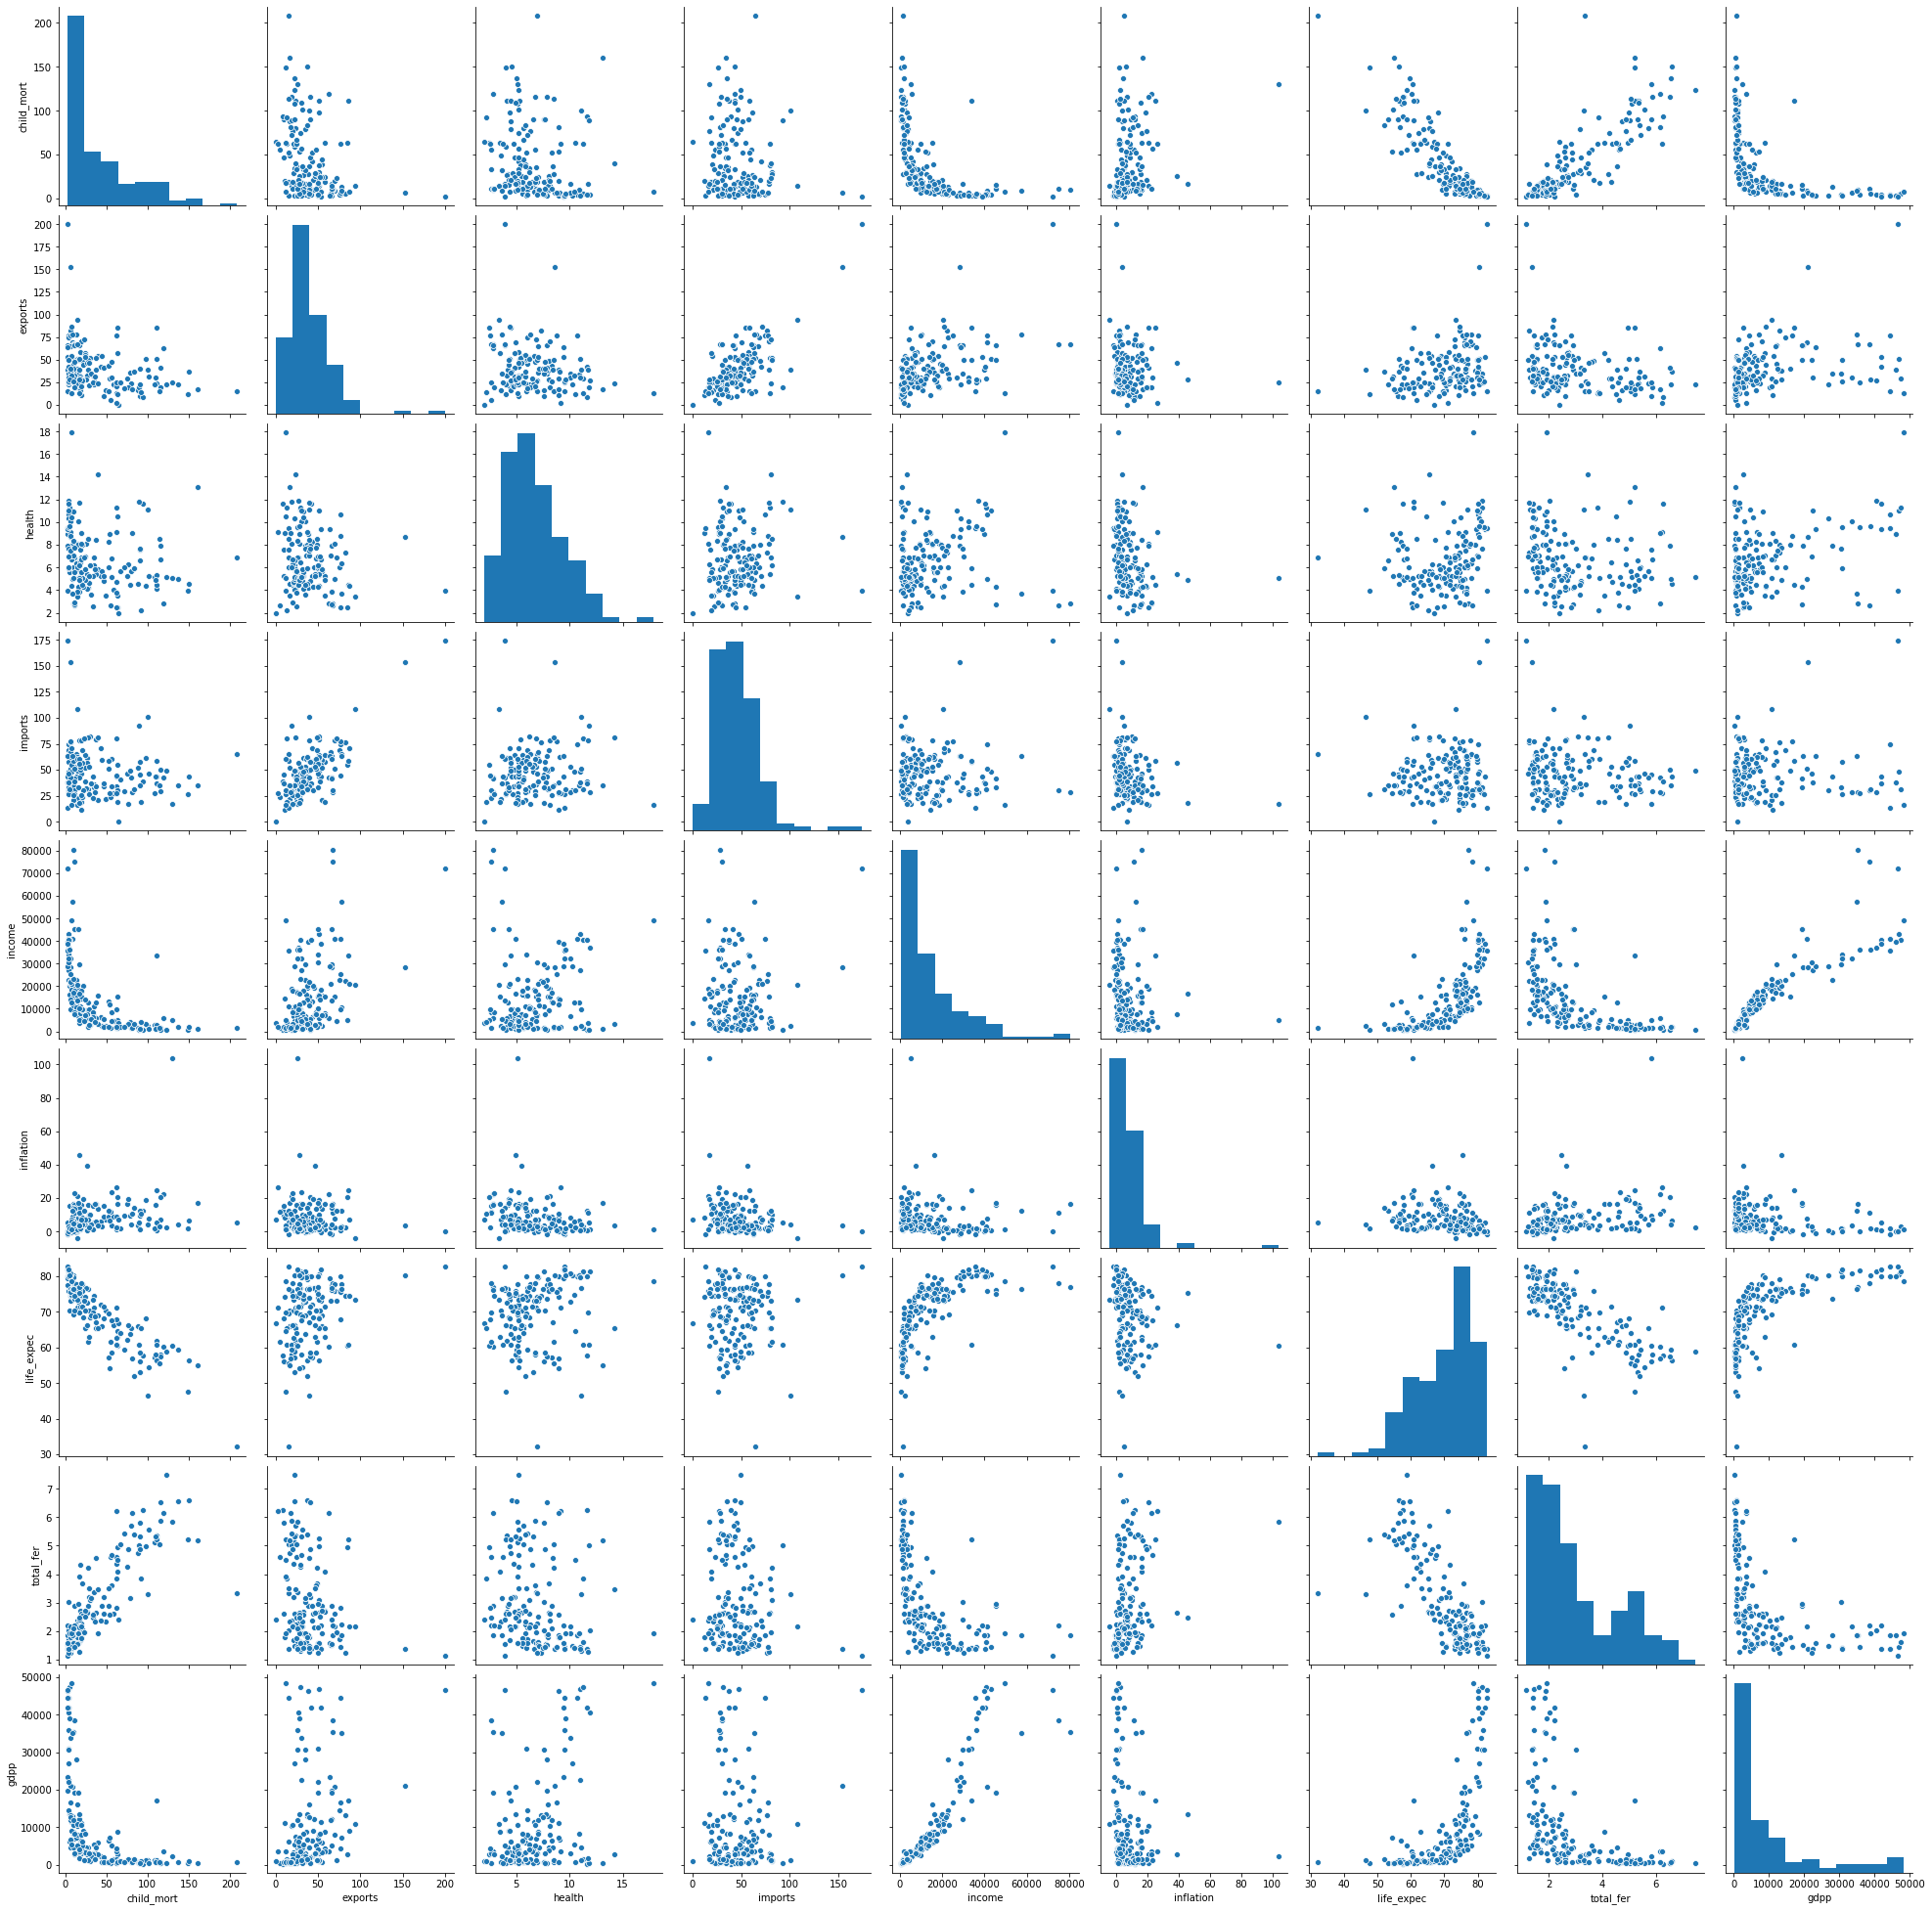

In [21]:
# pairplot of numerical variables

sns.pairplot(country_df, size=3)
plt.show()

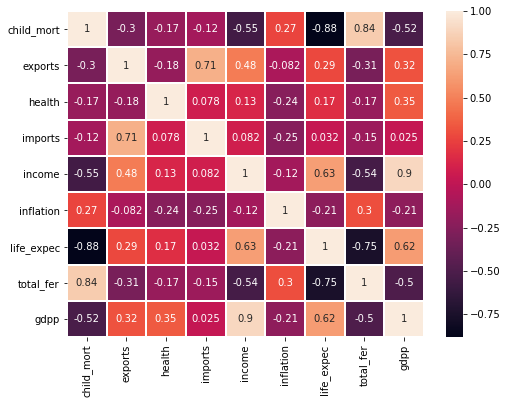

In [72]:
# let draw a heatmap to understand the correlation better
plt.figure(figsize=(8,6))
sns.heatmap(country_df.corr(), annot=True, linewidth= 1)
plt.show()

- We see high correlation between:
    - 'child_mort' and 'total_fer'
    - 'exports' and 'imports'
    - 'income' and 'gdpp'
- This will cause problem for the upcoming analysis, hence need to be removed but they have valuable information which we can't afford to loose.
- So, we will use PCA to overcome this multicollinearity.
- This will not only take care of multicollinearity but also will preserve the valuable information and also demensionality reduction

## 5. Scaling of the data

In [23]:
# Standardise all parameters

scaler= StandardScaler()
country_df1= scaler.fit_transform(country_df)
country_df1= pd.DataFrame(country_df1)
country_df1.columns= country_df.columns
country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-1.170253,0.333170,-0.063839,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.454926,-0.051834,0.095946,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.041627,-0.941453,-0.646837,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,0.908169,-1.434856,-0.150209,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.240530,-0.246204,0.540752,0.295540,-0.620888,0.780774,-0.575585,0.180376


## 6.PCA(Principle Component Analysis) on the data

In [24]:
pca= PCA(svd_solver='randomized', random_state=42)

In [25]:
# Doing the PCA on the data
pca.fit(country_df1)

PCA(random_state=42, svd_solver='randomized')

In [26]:
pca.components_

array([[-4.29030525e-01,  2.55209832e-01,  1.34178285e-01,
         1.31450432e-01,  4.07693446e-01, -1.79172211e-01,
         4.31281152e-01, -4.14623599e-01,  3.99105167e-01],
       [ 1.11571336e-01,  6.26379514e-01, -2.77405040e-01,
         6.77160121e-01, -2.31878558e-02, -5.16544119e-02,
        -1.67479074e-01,  7.48372976e-02, -1.51147079e-01],
       [-4.15586874e-02,  1.65804096e-01, -6.21898369e-01,
        -3.00546950e-01,  2.52933247e-01,  6.41231036e-01,
         1.20926305e-01,  5.91157438e-03,  6.23316904e-02],
       [ 3.78896334e-01,  1.25334264e-01,  4.18106890e-01,
         3.92312068e-02,  4.08208237e-01,  2.46846528e-01,
        -2.31647606e-01,  3.66642523e-01,  4.98720267e-01],
       [-2.10302855e-01,  2.05622263e-02,  4.97644383e-01,
         2.62211666e-01, -2.60517467e-01,  6.88800973e-01,
         1.29156175e-01, -1.65619335e-01, -2.29167627e-01],
       [ 1.86245017e-01, -5.01345979e-02, -4.28272915e-03,
        -4.26434872e-02,  1.45028292e-01,  6.489172

In [27]:
# Understanding how the variables are loaded on the principal components.

colnames = list(country_df1.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0], 'PC2':pca.components_[1], 'PC3':pca.components_[2], 
                      'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],
                      'PC7':pca.components_[6],'PC8':pca.components_[7], 'PC9':pca.components_[8], 'Feature':colnames})
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.429031,0.111571,-0.041559,0.378896,-0.210303,0.186245,0.021920,0.717303,0.253528,child_mort
1,0.255210,0.626380,0.165804,0.125334,0.020562,-0.050135,-0.687057,0.084911,-0.130857,exports
2,0.134178,-0.277405,-0.621898,0.418107,0.497644,-0.004283,-0.286172,-0.018871,0.116417,health
3,0.131450,0.677160,-0.300547,0.039231,0.262212,-0.042643,0.598129,-0.016664,0.060813,imports
4,0.407693,-0.023188,0.252933,0.408208,-0.260517,0.145028,0.087549,-0.298465,0.645748,income
5,-0.179172,-0.051654,0.641231,0.246847,0.688801,0.064892,0.111285,0.005323,-0.045257,inflation
6,0.431281,-0.167479,0.120926,-0.231648,0.129156,-0.605914,0.060919,0.521296,0.241639,life_expec
7,-0.414624,0.074837,0.005912,0.366643,-0.165619,-0.754047,-0.003597,-0.303233,-0.006760,total_fer
8,0.399105,-0.151147,0.062332,0.498720,-0.229168,0.000134,0.253074,0.157553,-0.651057,gdpp


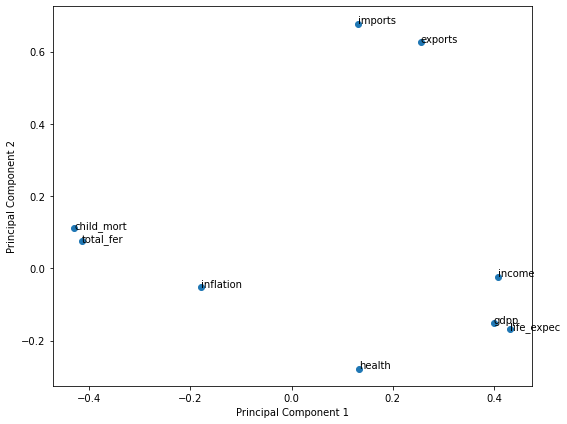

In [28]:
# Let's plot them to visualize how these features are loaded

plt.figure(figsize=(8,6))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [29]:
# Lets check the variance_ratio

pca.explained_variance_ratio_

array([0.45480475, 0.1766364 , 0.13336189, 0.10604223, 0.07260472,
       0.02594781, 0.01392215, 0.01011373, 0.00656633])

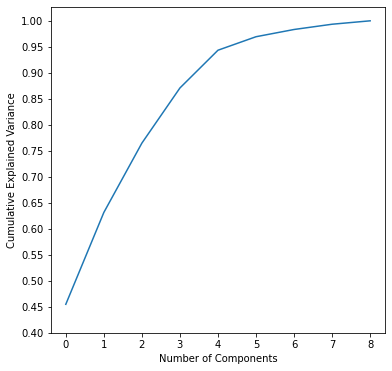

In [30]:
# making screeplot: cumulative variance against the number of components

plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()

- Around 95% of the variance is being explained by 5 components

### Dimensionality reduction using IncrementalPCA

In [31]:
# Using IncrementalPCA for efficiency

pca_final= IncrementalPCA(n_components=5)

In [32]:
df_final1= pca_final.fit_transform(country_df1)
df_final1.shape

(158, 5)

In [33]:
# checking correlation after PCA

corr1= np.corrcoef(df_final1.transpose())

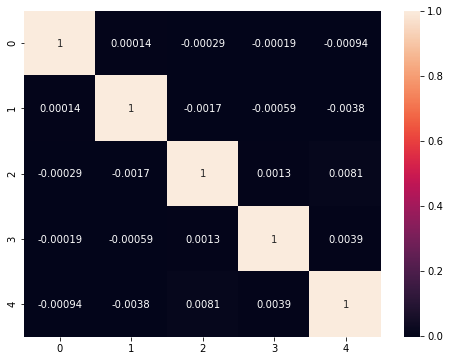

In [34]:
# Plotting the correlation matrix

plt.figure(figsize=(8,6))
sns.heatmap(corr1, annot=True)
plt.show()

In [35]:
corr1_nodiag= corr1 - np.diagflat(corr1.diagonal())
print('max corr: ',corr1_nodiag.max(), 'min corr: ',corr1_nodiag.min())

max corr:  0.008069188238944824 min corr:  -0.0038318816332859338


- We can see that correlation are indeed very close to 0

### Creating transpose so that each columns properly arranged.

In [36]:
pc = np.transpose(df_final1)

In [37]:
df_final= pd.DataFrame({'PC1':pc[0], 'PC2':pc[1],'PC3':pc[2], 'PC4':pc[3], 'PC5':pc[4]})
df_final.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401
3,-2.830780,1.451765,1.559083,1.124602,-0.375038
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215


In [38]:
df_final.shape

(158, 5)

## 7. K-Means

In [39]:
# silhouette Analysis
df_km= df_final
sse_= []
for k in range(2, 15):
    kmeans= KMeans(n_clusters=k).fit(df_km)
    sse_.append([k,silhouette_score(df_km, kmeans.labels_)])

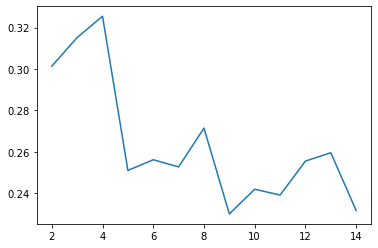

In [40]:

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Sum of squared distance

In [41]:
ssd= []
for num_clusters in list(range(1,21)):
    model_clus= KMeans(n_clusters=num_clusters, max_iter=50)
    model_clus.fit(df_km)
    ssd.append(model_clus.inertia_)

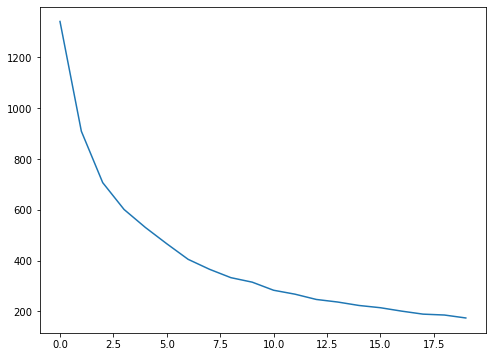

In [42]:
plt.figure(figsize=(8,6))    
plt.plot(ssd)
plt.show()

- By seeing Silhouette Analysis, the highest peak is at k=4.
- And by seeing sum of squared distance, elbow is in the range of 3 to 5.
- So let's take k = 4

### KMeans with k = 4

In [85]:
model_clus4= KMeans(n_clusters= 4, max_iter=50, random_state=50)
model_clus4.fit(df_km)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [88]:
df_km1 =  df_final
df_km1.index = pd.RangeIndex(len(df_km1.index))
countries_detail_km= pd.concat([df_km1, pd.Series(model_clus4.labels_)], axis=1)
countries_detail_km.columns= ['PC1','PC2','PC3','PC4','PC5','ClusterID']
countries_detail_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467,2
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401,2
3,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215,2


In [45]:
countries_detail_km['ClusterID'].value_counts()

2    83
1    46
0    27
3     2
Name: ClusterID, dtype: int64

### Scatterplot Between PC components and Cluster-ID

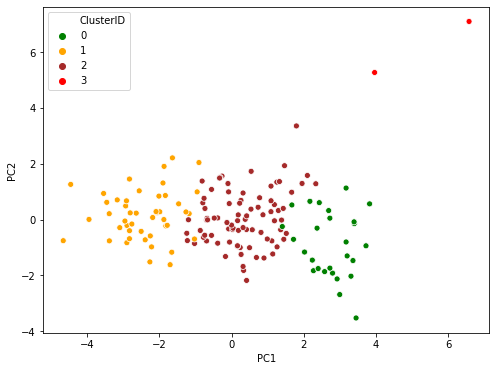

In [46]:
# scatterplot between PC1, PC2 and Cluster-ID
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue= 'ClusterID', data= countries_detail_km, palette=['green', 'orange', 'brown', 'red'])
plt.show()

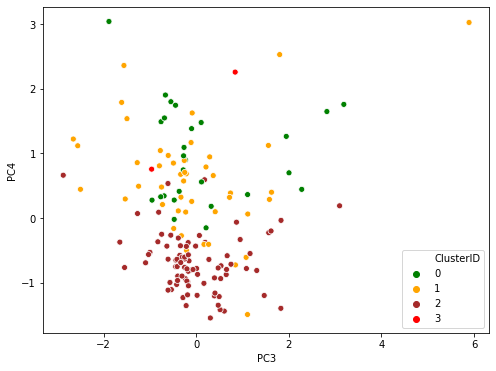

In [47]:
# scatterplot between PC3, PC4 and Cluster-ID
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC3', y='PC4', hue= 'ClusterID', data= countries_detail_km, palette=['green', 'orange', 'brown', 'red'])
plt.show()

In [48]:
# merge between kmean df and actual data

country_merge_km= pd.merge(country_df.reset_index(),countries_detail_km, left_index=True, right_index=True)
country_merge_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.571663,-0.365855,-0.285368,-1.233879,0.278467,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.082299,-0.334262,1.307774,-0.813505,0.215401,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.295018,0.323543,-0.154906,-0.664375,-0.173215,2


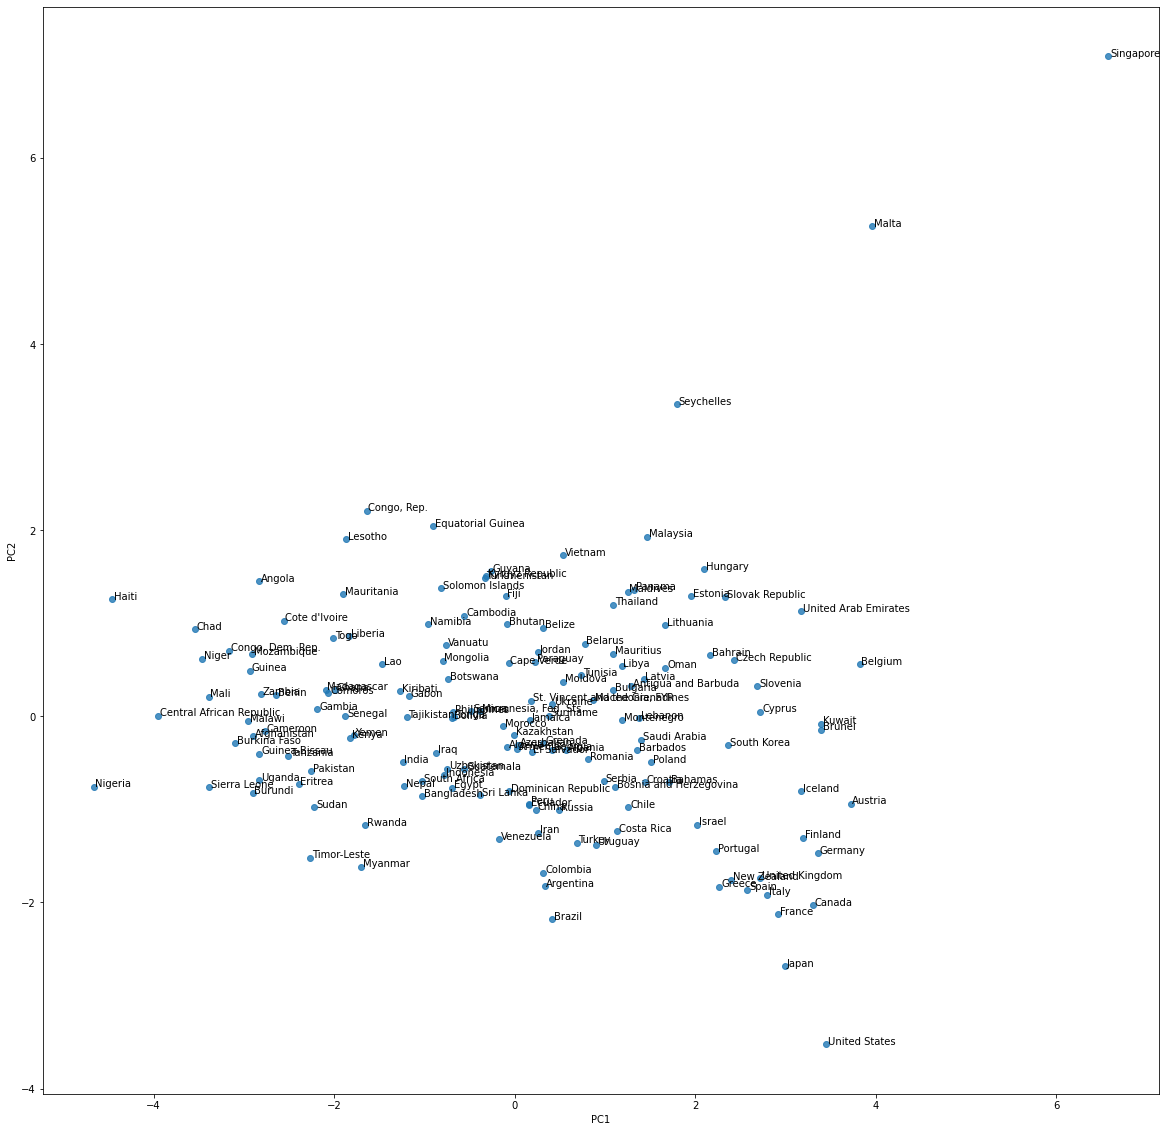

In [49]:
# plot between PC1,PC2 and country

plt.figure(figsize=(20,20))
sns.regplot(x='PC1', y='PC2', data=country_merge_km, fit_reg=False)

def label_point(x,y,val,ax):
    a= pd.concat({'x':x, 'y':y, 'val':val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
label_point(country_merge_km.PC1, country_merge_km.PC2,country_merge_km.country, plt.gca())

### Scatterplot Between Actual Variables and Cluster-ID

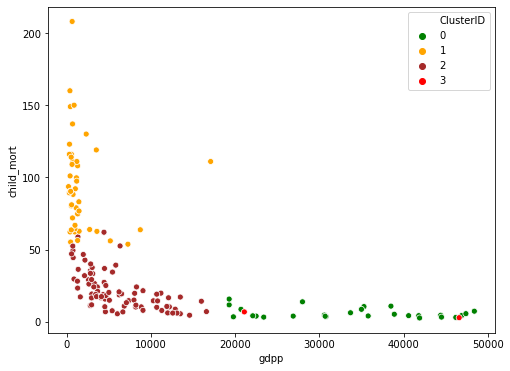

In [50]:
# scatterplot b/w gdpp, child_mort and cluster-id

plt.figure(figsize=(8,6))
sns.scatterplot(x='gdpp', y='child_mort', hue='ClusterID', data=country_merge_km, palette=['green', 'orange', 'brown', 'red'])
plt.show()

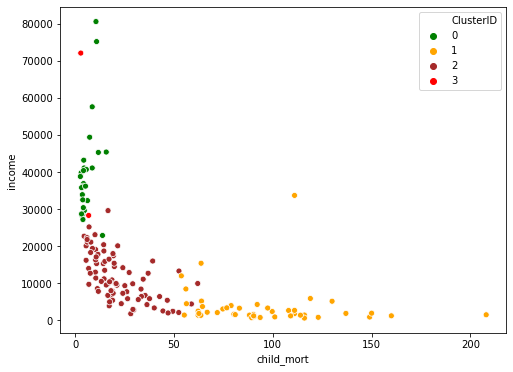

In [51]:
# scatterplot b/w child_mort, income and cluster-id

plt.figure(figsize=(8,6))
sns.scatterplot(x='child_mort', y='income', hue='ClusterID', data=country_merge_km, palette=['green', 'orange', 'brown', 'red'])
plt.show()

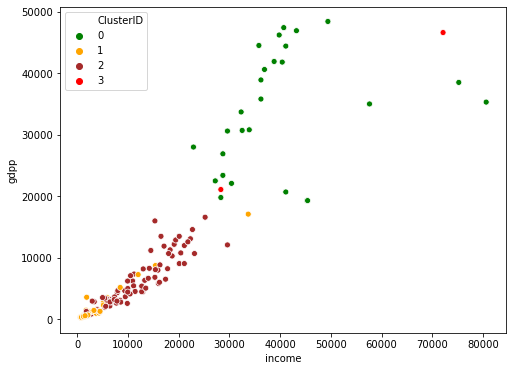

In [52]:
# scatterplot b/w income, child_mort and cluster-id

plt.figure(figsize=(8,6))
sns.scatterplot(x='income', y='gdpp', hue='ClusterID', data=country_merge_km, palette=['green', 'orange', 'brown', 'red'])
plt.show()

In [53]:
# Dropping the PC components and after that we can see all features including cluster-id

country_final=country_merge_km.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


- So we have performed the clustering using PC components and have now allocated the cluster-id back to the original datapoint.

### Analysing the Clusters by using these three variables- 'gdpp', 'child_mort', 'income'

In [54]:
child_mort_mean= pd.DataFrame(country_final.groupby(['ClusterID']).child_mort.mean())
gdpp_mean= pd.DataFrame(country_final.groupby(['ClusterID']).gdpp.mean())
income_mean= pd.DataFrame(country_final.groupby(['ClusterID']).income.mean())

In [55]:
country_analysis_df= pd.concat([pd.Series([0,1,2,3]),child_mort_mean, gdpp_mean, income_mean], axis=1)
country_analysis_df.columns= ['ClusterID','child_mort_mean', 'gdpp_mean', 'income_mean']
country_analysis_df

,ClusterID,child_mort_mean,gdpp_mean,income_mean
0,0,6.092593,33829.629630,39933.333333
1,1,94.439130,1749.782609,3543.760870
2,2,22.080723,6081.012048,11657.228916
3,3,4.800000,33850.000000,50200.000000


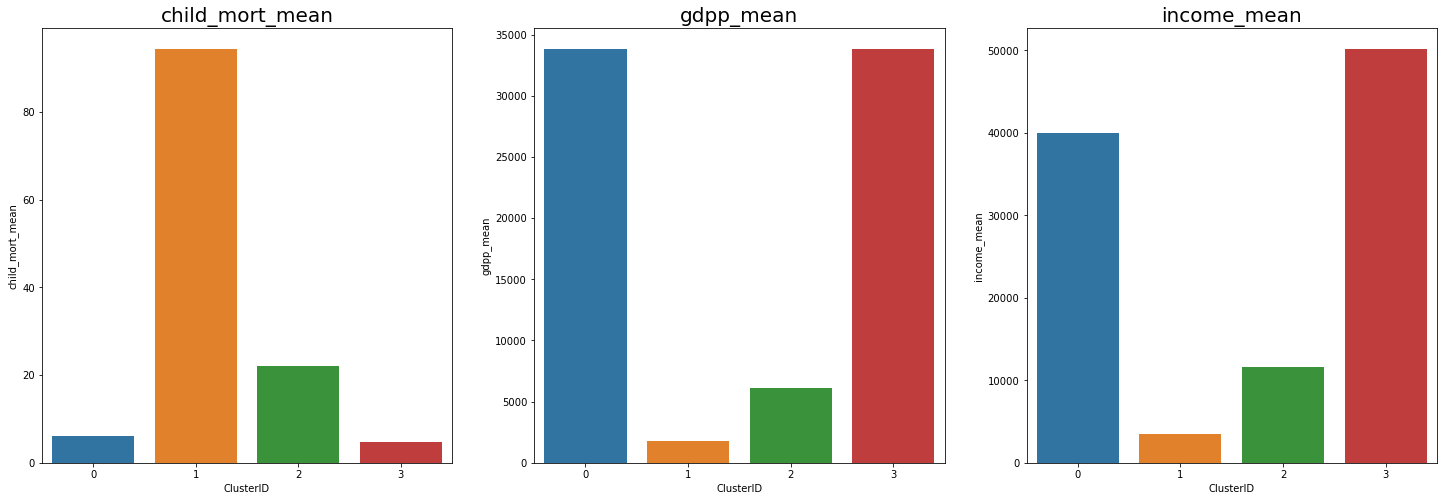

In [56]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('child_mort_mean', size=20)
sns.barplot(x='ClusterID', y='child_mort_mean', data= country_analysis_df)
plt.subplot(1,3,2)
plt.title('gdpp_mean', size=20)
sns.barplot(x='ClusterID', y='gdpp_mean', data= country_analysis_df)
plt.subplot(1,3,3)
plt.title('income_mean', size=20)
sns.barplot(x='ClusterID', y='income_mean', data= country_analysis_df)
plt.show()

- **By seeing above graph, we can conclude that 'cluster- 1' is our cluster of concern becouse :-**
    - It has highest child_mort.
    - Lowest gdpp.
    - And lowest income.

In [57]:
# Let us bin our cluster 1

cluster_km= country_final[country_final['ClusterID']==1]
cluster_km.sort_values('gdpp', ascending=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
48,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1


- As per K-Means clustering, the country which are direst need of aid are :

    - Burundi
    - Liberia
    - Congo, Dem, Rep.
    - Niger
    - Sierra Leone
    - Madagascar
    - Mozambique
    - Central African Republic
    - Malawi
    - Eritrea

## 8. Hierarchical Clustering

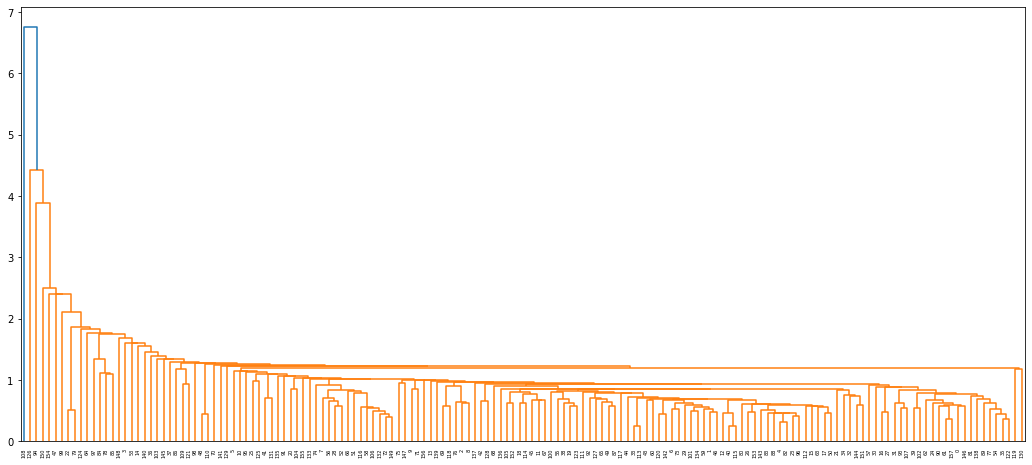

In [74]:
# Hierarchical clustering using single method

df_hc= df_final
plt.figure(figsize=(18,8))
mergings= linkage(df_hc, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

- By single method Hierarchical clustering the things are not clear.
- so now we go for complete method hirarchical clustering.

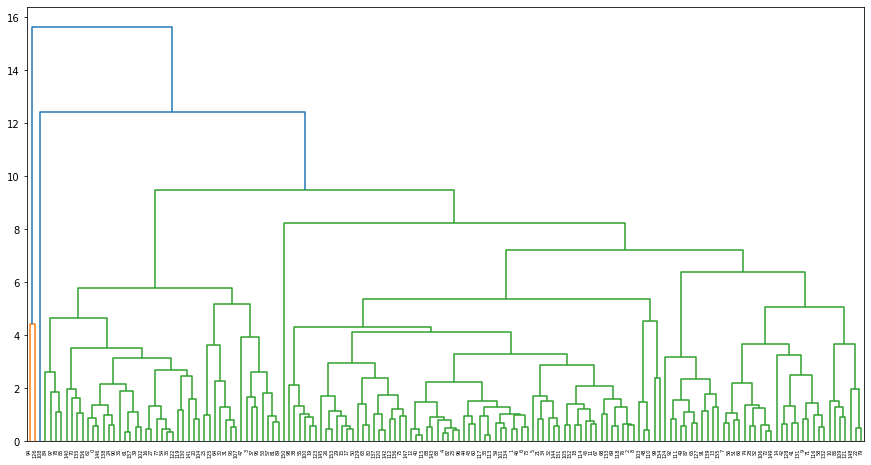

In [73]:
# Hierarchical clustering using complete method

plt.figure(figsize=(15,8))
mergings= linkage(df_hc, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

- Let us cut the dendrogram vertically such that n_clusters = 4

In [60]:
# cutting dendrogram vertically such that n_clusters=4

cluster_cut= pd.Series(cut_tree(mergings, n_clusters=4).reshape(-1))

In [61]:
country_hc=pd.concat([country_df.reset_index(),cluster_cut],axis=1)
country_hc.columns= ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']
country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [62]:
country_hc['ClusterID'].value_counts()

1    110
0     45
2      2
3      1
Name: ClusterID, dtype: int64

### Scatterplot Between original datapoint and cluster-id

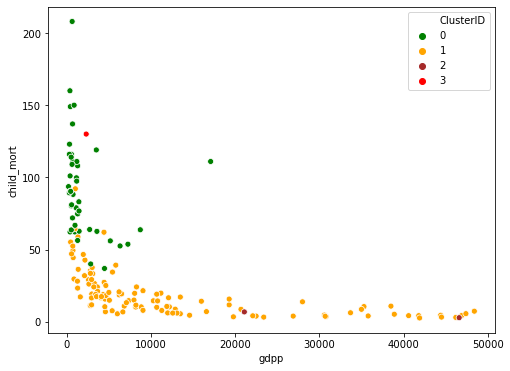

In [63]:
# scatterplot b/w gdpp,child_mort and cluster-id

plt.figure(figsize=(8,6))
sns.scatterplot(x='gdpp', y='child_mort', hue='ClusterID',data=country_hc, palette=['green','orange', 'brown','red'])
plt.show()

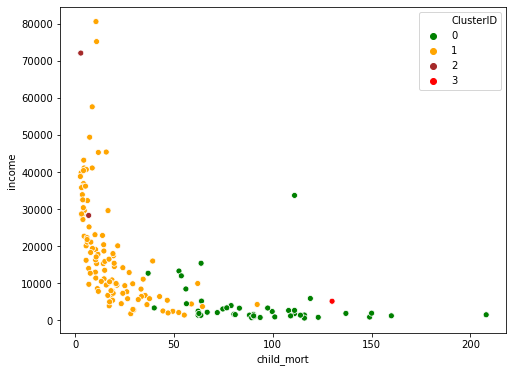

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='child_mort', y='income', hue='ClusterID',data=country_hc, palette=['green','orange', 'brown','red'])
plt.show()

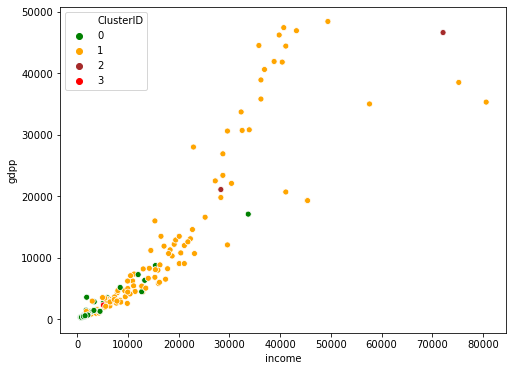

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='income', y='gdpp', hue='ClusterID',data=country_hc, palette=['green','orange', 'brown','red'])
plt.show()

### Analysing the Hierarchical-Clusters by using these three variables- 'gdpp', 'child_mort', 'income'

In [66]:
child_mort_mean_hc= pd.DataFrame(country_hc.groupby(['ClusterID']).child_mort.mean())
gdpp_mean_hc= pd.DataFrame(country_hc.groupby(['ClusterID']).gdpp.mean())
income_mean_hc= pd.DataFrame(country_hc.groupby(['ClusterID']).income.mean())

In [67]:
country_analysis_df_hc= pd.concat([pd.Series([0,1,2,3]),child_mort_mean_hc, gdpp_mean_hc, income_mean_hc], axis=1)
country_analysis_df_hc.columns= ['ClusterID','child_mort_mean_hc', 'gdpp_mean_hc', 'income_mean_hc']
country_analysis_df_hc

,ClusterID,child_mort_mean_hc,gdpp_mean_hc,income_mean_hc
0,0,91.820000,1985.777778,3950.733333
1,1,18.904545,12790.218182,18416.636364
2,2,4.800000,33850.000000,50200.000000
3,3,130.000000,2330.000000,5150.000000


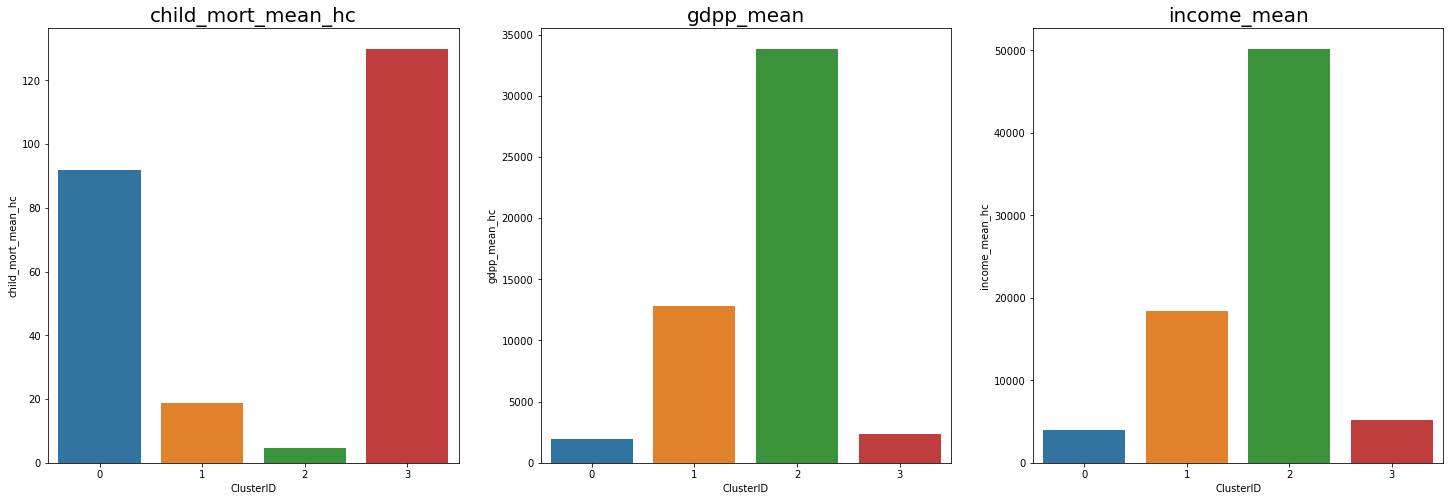

In [68]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.title('child_mort_mean_hc', size=20)
sns.barplot(x='ClusterID', y='child_mort_mean_hc', data= country_analysis_df_hc)
plt.subplot(1,3,2)
plt.title('gdpp_mean', size=20)
sns.barplot(x='ClusterID', y='gdpp_mean_hc', data= country_analysis_df_hc)
plt.subplot(1,3,3)
plt.title('income_mean', size=20)
sns.barplot(x='ClusterID', y='income_mean_hc', data= country_analysis_df_hc)
plt.show()

 **By seeing above graph, we can conclude that here are two clusters that is 'cluster- 3' and 'cluster- 0' for our cluster of concern but we leave 'cluster- 3' as it has only 1 country and we use 'cluster- 0' because:-**
- Cluster-0 has highest child_mort.
- Lowest gdpp.
- And lowest income.

In [69]:
# Let us bin our cluster 0

cluster_hc= country_hc[country_hc['ClusterID']==0]
cluster_hc.sort_values('gdpp', ascending=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
141,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0


**As per Hierarchical clustering, the country which are direst need of aid are :**

- Burundi
- Liberia
- Congo, Dem, Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi
- Togo

## Decision Making

**We got same countries by both K-Means and Hierarchical clustering. Therefore following are the countries ehic are direst need of aid by considering socio-economic factor into consideration:-**
- Burundi
- Liberia
- Congo, Dem, Rep.
- Niger
- Sierra Leone
- Madagascar
- Mozambique
- Central African Republic
- Malawi